# Thermal Physics - Homework 9
> Alfaifi, Ammar - 201855360

## Question 1
### (a)
From table in the book, we have the molar Gibbs free energies of formation of both the cacite and aragonite.
Value of cacite is smaller by 1.0 kJ. Hence, cacite is more stable.

### (b)
By plotting the G vs. P graph and finding the slope, as
$$
    \Delta{P} = \frac{\Delta G}{\Delta V}
$$

Then we get slopes as $V_c = 3.693$ kJ/kbar and $V_a = 3.415$ kJ/kbar, taken from the table.
setting $G_c = 0$ at $P=0$; then $G_a = 1.0$ kJ at $P=0$, so we have two line equations
$$
   G_c = V_c P \qquad G_a = V_a P + 1.0 \text{kJ}.
$$

Require that $G_a = G_c$, we get
$$
    P = \frac{1.0 \text{kJ}}{V_c - V_a} = \frac{1.0 \text{kJ}}{0.278 \text{kJ/kbar}} = 3.6 \text{kbar}.
$$

## Question 2

The graph of G vs. I' has a slope of -S, indicating that each graph's slope should be negative and become increasingly negative as temperature rises. Additionally, the stable phase at any specific temperature should have the lowest G value. For H2O at atmospheric pressure, the stable phases are ice below 0°C, water between 0°C and 100°C, and steam above 100°C. The left plot below qualitatively illustrates these characteristics.

![Gibbs versus Temperature](./Gibbs%20versus%20Temperature.png)

As the pressure is reduced, the relation $(\partial G/ \partial P)_T = V$ tells us that the Gibbs free energy
of each phase will decrease. However, that of the gas phase will decrease the fastest by far, since its volume is so much greater. At pressures below the triple point (0.006 bar), there is no temperature at which liquid water is stable. So at 0.001 bar, the graphs of G vs. T would look something like the plot above right.

## Question 3
### (a)

From the van der Waals equation (5.52)
$$
    \frac{\partial P}{\partial V} = - \frac{NkT}{(V-Nb)^2} + \frac{2aN^2}{V3} ; \qquad
    \frac{\partial^2 P}{\partial V^2} = \frac{2NkT}{(V-Nb)^3} - \frac{6aN^2}{V^4}
$$

According to the text first derivative and the second derivative all should equal zero, thus

$$
    \frac{NkT}{(V-Nb)^2} = \frac{2aN^2}{V3}, \qquad 
    \frac{2NkT}{(V-Nb)^3} = \frac{6aN^2}{V^4}
$$

Divide the first one by the other, we get
$$
    \frac{1}{2}(V_c - Nb) = \frac{1}{3}V_c
$$
or
$$
    V_c = 3Nb
$$
as asked. No we use this result and substitute it back into the original one,

$$
    \frac{NkT_c}{(3Nb - Nb)^2} = \frac{2aN^2}{(3Nb)^3}
$$
then
$$
    kT_c = \frac{8}{27} \frac{a}{b}
$$

Now for critical pressure, we use the last result put in the van der Waals equation,

$$
    P_c = \frac{NkT_c}{V_c - Nb} - \frac{aN^2}{V_c^3} = \frac{1}{27} \frac{a}{b^2}
$$

### (b)

Using the reduced variables equation to write in terms of them, we have $T=tT_c$, $P=pP_c$, and $V=vV_c$, into the van der Waals equation,

$$
    pP_c = \frac{NktT_c}{vV_c -- Nb} - \frac{aN^2}{v^2 V_c^2}.
$$
With results from part (a), we have

$$
    \frac{1}{27} \frac{a}{b^2} p = \frac{Nt}{3Nbv - Nb} \frac{8}{27} \frac{a}{b}
     - \frac{aN^2}{9N^2b^2 v^2} = \frac{a}{27 b^2}.
$$

Hence, 
$$
    p = \frac{8t}{3v - 1 } - \frac{3}{v^2}.
$$
Note that variables $a$ and $b$ disappeared.

In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import quad
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('pdf')
plt.rcParams |= {
    'text.usetex': True,
    'figure.figsize': (10, 4)
}
sns.set_theme()
set_matplotlib_formats('svg', 'pdf')

In [140]:
from scipy.optimize import fsolve, root


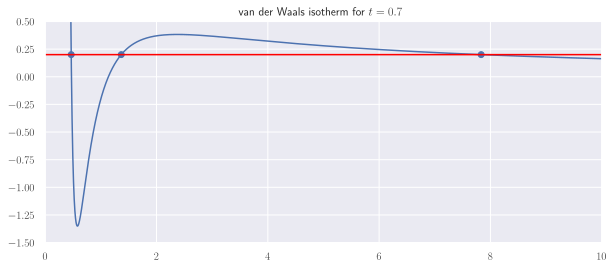

In [199]:
def red_pressure(red_volume, red_temp=1.0):
    return (8 * red_temp / (3*red_volume - 1)) - (3 / red_volume**2)

def find_vapor_pressure():
    return 0
red_volume_range = np.arange(0.335, 10, 0.001)

vapor_pressure = 0.2
roots = [0.46720, 1.36622, 7.83323]

plt.plot(red_volume_range, red_pressure(red_volume_range, 0.7))
plt.hlines([vapor_pressure], 0, 10, colors='red')
plt.scatter(roots, [vapor_pressure]*3)
plt.title('van der Waals isotherm for $t=0.7$')
plt.ylim((-1.5, 0.5))
plt.xlim((0, 10))
plt.show()

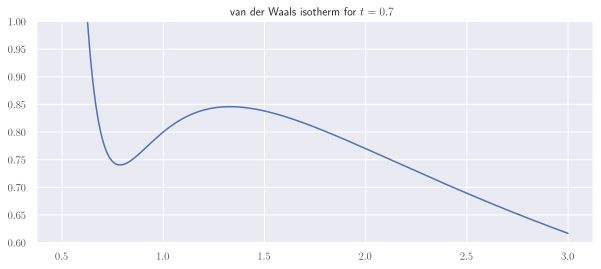

In [233]:
def red_pressure(red_volume, red_temp=1.0):
    return (8 * red_temp / (3*red_volume - 1)) - (3 / red_volume**2)

def find_vapor_pressure():
    return 0
red_volume_range = np.arange(0.5, 3, 0.001)

vapor_pressure = 0.2
roots = [0.46720, 1.36622, 7.83323]

plt.plot(red_volume_range, red_pressure(red_volume_range, 0.95))
plt.title('van der Waals isotherm for $t=0.7$')
plt.ylim((0.6, 1))
plt.show()

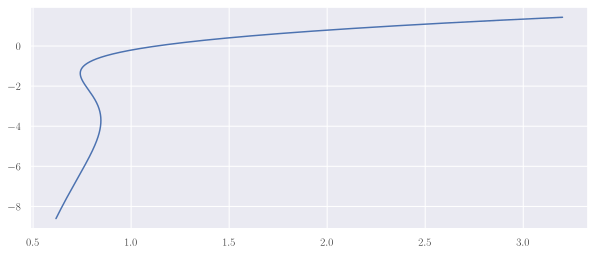

In [237]:
def Gibbs(v, t=1.):
    return -t * np.log(3*v - 1) + t/(3*v-1) - 9/4*v


plt.plot(red_pressure(red_volume_range, 0.95), Gibbs(red_volume_range, 0.95))
#plt.xlim((-1.5, 0.7))
#plt.ylim((-3, -2))
plt.show()

In [200]:
quad(lambda x: red_pressure(x)-0.2, roots[0], roots[1])

(1.0435186607108056, 1.6116650585269894e-09)

With equation
$$
    \frac{G}{NkT_c} = - t \ln{(3v - 1)}+ \frac{t}{3v - 1} - \frac{9}{4v} + C(T)
$$

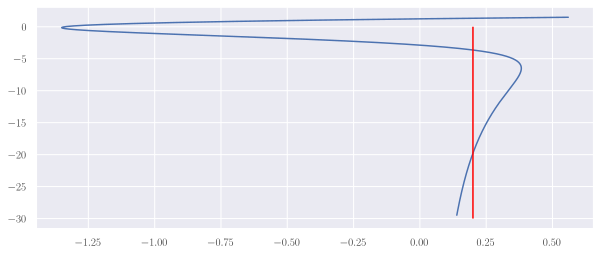

In [221]:
def Gibbs(v, t=1.):
    return -t * np.log(3*v - 1) + t/(3*v-1) - 9/4*v

red_volume_range = np.arange(0.46, 12, 0.001)

plt.plot(red_pressure(red_volume_range, 0.7), Gibbs(red_volume_range, 0.7))
plt.vlines([vapor_pressure], -30, 0, colors='red')
#plt.xlim((-1.5, 0.7))
#plt.ylim((-3, -2))
plt.show()